<a href="https://colab.research.google.com/github/RaianaSeixas/0_paper_one_revisited/blob/main/JADE_AND_Pop_H_Frannk_0_5F_DE_Schwefel_223_D10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight
%cd optim_raianars_Insight

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 369 (delta 31), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (369/369), 325.77 KiB | 1.71 MiB/s, done.
Resolving deltas: 100% (212/212), done.
/content/optim_raianars_Insight/ANN_read_matrix/optim_raianars_Insight/ANN_read_matrix/optim_raianars_Insight


In [ ]:
import Function
import Go2MinMax
from GeraIndices import GeraIndices
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
from AvaliaX import AvaliaX

import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### Função
dim=10 # 
fchoice='Schwefel_223'
Fun=Function.Schwefel_223
MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
#MAX=np.repeat(1.28,dim)
#MIN=np.repeat(-1.28,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))


############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #00 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/2.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [ ]:
!pip install PyFDE

In [ ]:
import pyfde
solver = pyfde.JADE(Fun, n_dim= dim, n_pop=NPAR, limits=bounds, minimize=True)
solver.p = 0.05
solver.c = 0.1

In [ ]:
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]

In [ ]:
start_time = time.time()
BEST_AGENTS=[]
BEST_FIT =[]
rows = RUNS
cols = dim + 1
BEST_XY = np.zeros((rows,cols))
for iii in range(RUNS):
  best, fit = solver.run(n_it=ITE)
  kkk = -1
  for xi in best:
    kkk = kkk +1
    BEST_XY[iii,kkk] = xi
  BEST_XY[iii,dim] = -fit
  BEST_AGENTS.append(best)
  TIME = (time.time() - start_time) /60
  BEST_FIT.append(-fit)
  print('ite ', iii,'time ', TIME,'fob =', -fit)
    
############################## Cálculo dos Parâmetros de Avaliação   
JADE_TIME = (time.time() - start_time)/RUNS

ite  0 time  0.02303107182184855 fob = 0.0
ite  1 time  0.04721061786015828 fob = 0.0
ite  2 time  0.07123664617538453 fob = 0.0
ite  3 time  0.0947912335395813 fob = 0.0
ite  4 time  0.11879095633824667 fob = 0.0
ite  5 time  0.142598557472229 fob = 0.0
ite  6 time  0.16641528606414796 fob = 0.0
ite  7 time  0.19011449019114177 fob = 0.0
ite  8 time  0.21378544569015503 fob = 0.0
ite  9 time  0.2375653902689616 fob = 0.0
ite  10 time  0.26103982925415037 fob = 0.0
ite  11 time  0.28461499214172364 fob = 0.0
ite  12 time  0.3077805399894714 fob = 0.0
ite  13 time  0.3308855970700582 fob = 0.0
ite  14 time  0.3545207778612773 fob = 0.0
ite  15 time  0.3779065489768982 fob = 0.0
ite  16 time  0.40157734950383506 fob = 0.0
ite  17 time  0.42504505316416424 fob = 0.0
ite  18 time  0.4483489473660787 fob = 0.0
ite  19 time  0.47243104775746664 fob = 0.0
ite  20 time  0.4960570573806763 fob = 0.0
ite  21 time  0.5198672731717427 fob = 0.0
ite  22 time  0.5436154961585998 fob = 0.0
ite  23 ti

In [ ]:
IND_XY = np.argsort(np.array(BEST_XY[:,-1]))
BEST_XY = BEST_XY[IND_XY,:]

In [ ]:
JADE_BEST=BEST_XY[0]
JADE_WORSE=BEST_XY[-1]
JADE_MEAN=np.mean(BEST_XY,axis=0)
JADE_MAXFO=BEST_XY[:,-1].max()
JADE_MINFO=BEST_XY[:,-1].min()
JADE_STD=BEST_XY[:,-1].std()
JADE_BEST=BEST_XY[(rows-1),(cols-1)]

In [ ]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/ANN_read_matrix/optim_raianars_Insight/ANN_read_matrix/optim_raianars_Insight/ANN_read_matrix


In [ ]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [ ]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [ ]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.5
Npar1= 52
Npar2= 16
Npar3= 16
Npar4= 16
Npar= 100


In [ ]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

/content/optim_raianars_Insight/GeraIndices.py:57: RuntimeWarning: invalid value encountered in double_scalars
  if abs(MAT_IND[0,8]/MAT_IND[0,8])>1:
/content/optim_raianars_Insight/GeraIndices.py:60: RuntimeWarning: invalid value encountered in double_scalars
  MAT_IND[0,10]=MAT_IND[0,8]/MAT_IND[0,8]
/content/optim_raianars_Insight/GeraIndices.py:62: RuntimeWarning: invalid value encountered in double_scalars
  if abs(MAT_IND[0,9]/MAT_IND[0,9])>1: # tem que pegar primeira
/content/optim_raianars_Insight/GeraIndices.py:65: RuntimeWarning: invalid value encountered in double_scalars
  MAT_IND[0,11]=MAT_IND[0,9]/MAT_IND[0,9] # tem que pegar do anterior


k= 0 time= 0.7283929586410522 FO= 0.0
k= 1 time= 1.4528147021929423 FO= 0.0
k= 2 time= 2.17770832379659 FO= 0.0
k= 3 time= 2.9026251912117003 FO= 0.0
k= 4 time= 3.6259271343549093 FO= 0.0
k= 5 time= 4.353601900736491 FO= 0.0
k= 6 time= 5.077626518408457 FO= 0.0
k= 7 time= 5.800068326791128 FO= 0.0
k= 8 time= 6.522562126318614 FO= 0.0
k= 9 time= 7.244642547766367 FO= 0.0
k= 10 time= 7.96649036804835 FO= 0.0
k= 11 time= 8.692083378632864 FO= 0.0
k= 12 time= 9.417056318124136 FO= 0.0
k= 13 time= 10.140319840113323 FO= 0.0
k= 14 time= 10.864473438262939 FO= 0.0
k= 15 time= 11.585977224508921 FO= 0.0
k= 16 time= 12.308833448092143 FO= 0.0
k= 17 time= 13.032594974835714 FO= 0.0
k= 18 time= 13.760216828187307 FO= 0.0
k= 19 time= 14.485018674532572 FO= 0.0
k= 20 time= 15.208482797940572 FO= 0.0
k= 21 time= 15.932362894217173 FO= 0.0
k= 22 time= 16.65591118335724 FO= 0.0
k= 23 time= 17.378750483194988 FO= 0.0
k= 24 time= 18.10085932413737 FO= 0.0
k= 25 time= 18.826552883783975 FO= 0.0
k= 26 tim

In [ ]:
#len(X2[1,:])
print(cols)

10


In [ ]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [ ]:
pd.set_option('display.max_columns', 30)  
#print(df)

Text(0, 0.5, 'CR')

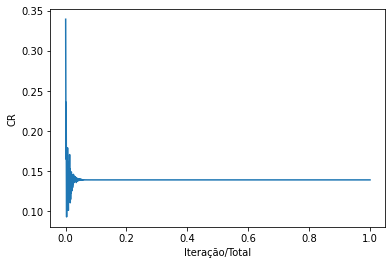

In [ ]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

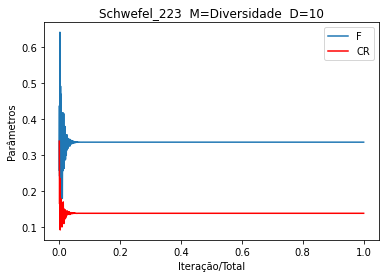

In [ ]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Schwefel_223_Diversidade_D=10')

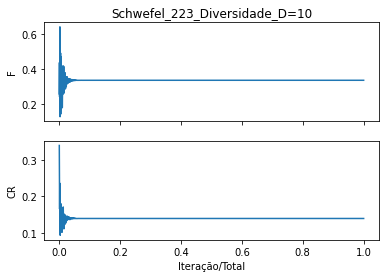

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [ ]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

print('======== JADE ==============')
print('MÉDIA: ',JADE_MEAN[-1])
print('MIN __:',JADE_MINFO)
print('MAX__: ',JADE_MAXFO)
print('STD __:',JADE_STD)
print("Tempo Médio= %.3f segundos ---" % (JADE_TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',JADE_BEST)

print(JADE_MEAN[-1])
print(JADE_STD)
print(JADE_MINFO)

print('================================')

MCS-FRANNK Fator F/DE= 0.50 NPAR= 100 Iterações= 2000 Dim= 10 Min/Max= -10 / 10 _ Schwefel_223
SUB_Fo-0.5_CRo-0.5_D-10_Interv-2000 

MÉDIA:  0.0 STD __: 0.0
MIN __: 0.0 MAX__:  0.0
0.0
0.0
0.0
Tempo Médio= 43.464 segundos ---
50 Rodadas

BEST:  [ 3.57112859e-33 -2.43198901e-33  2.85794991e-33  3.06583059e-33
 -2.36421270e-33 -3.92801993e-33  4.09760882e-33 -3.52644620e-33
  4.32413672e-33 -2.00302927e-33  0.00000000e+00]
======== JADE ==============
MÉDIA:  0.0
MIN __: 0.0
MAX__:  0.0
STD __: 0.0
Tempo Médio= 1.413 segundos ---
50 Rodadas

BEST:  0.0
0.0
0.0
0.0


In [ ]:
print('FRANNK POP H                 JADE')
print(MEAN[-1],'       ',JADE_MEAN[-1])
print(STD,'      ',JADE_STD)
print(MINFO,'       ',JADE_MINFO)


FRANNK POP H                 JADE
0.0         0.0
0.0        0.0
0.0         0.0
